<a href="https://colab.research.google.com/github/daniel-usp/MBA-BIA-USP/blob/main/aula_machine_learning_usp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

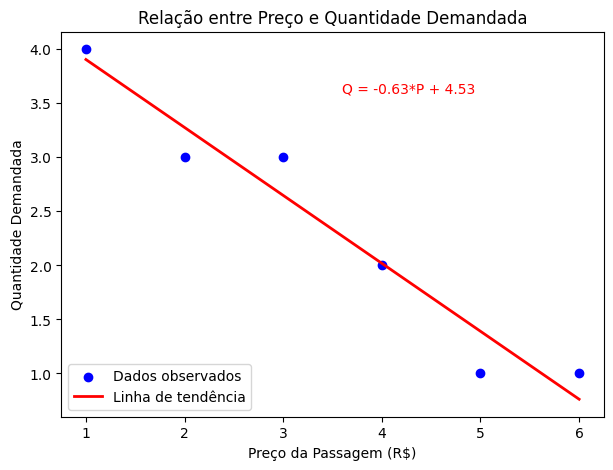

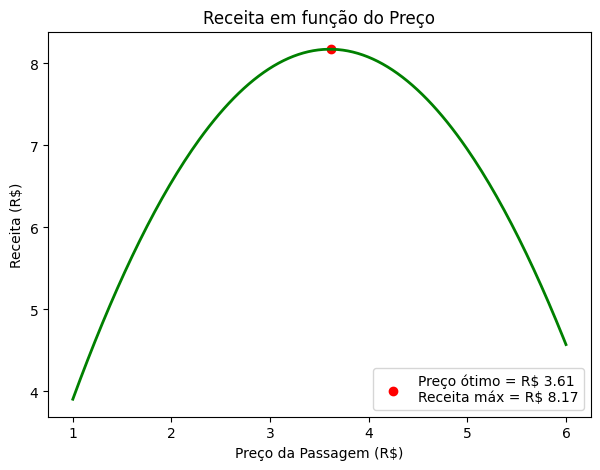

📈 Equação da Demanda: Q = -0.63*P + 4.53
💵 Preço que maximiza a Receita: R$ 3.61
💰 Receita Máxima: R$ 8.17


In [ ]:
# ====================================================
# 📊 Análise de Demanda e Receita - Voos Guarulhos -> Orlando
# ====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Carregar os dados
# Substitua pelo caminho do seu arquivo no Colab
df = pd.read_excel('/content/exemplo.xlsx')

# 2. Ajustar nomes das colunas (remoção de espaços extras)
df.columns = df.columns.str.strip()

# 3. Definir variáveis
X = df[['Preço']].values
y = df['Quantidade'].values

# 4. Regressão Linear
model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

# 5. Gráfico: Preço x Quantidade (Demanda)
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_range)

plt.figure(figsize=(7,5))
plt.scatter(X, y, color="blue", label="Dados observados")
plt.plot(X_range, y_pred, color="red", linewidth=2, label="Linha de tendência")
plt.xlabel("Preço da Passagem (R$)")
plt.ylabel("Quantidade Demandada")
plt.title("Relação entre Preço e Quantidade Demandada")
equation = f"Q = {slope:.2f}*P + {intercept:.2f}"
plt.text(X.max()*0.6, y.max()*0.9, equation, fontsize=10, color="red")
plt.legend()
plt.show()

# 6. Receita: R(P) = P * Q(P)
P = np.linspace(X.min(), X.max(), 200)
Q_pred = slope * P + intercept
R = P * Q_pred

# Encontrar ponto ótimo
idx_max = np.argmax(R)
P_max = P[idx_max]
R_max = R[idx_max]

# 7. Gráfico: Receita x Preço
plt.figure(figsize=(7,5))
plt.plot(P, R, color="green", linewidth=2)
plt.scatter(P_max, R_max, color="red", label=f"Preço ótimo = R$ {P_max:.2f}\nReceita máx = R$ {R_max:.2f}")
plt.xlabel("Preço da Passagem (R$)")
plt.ylabel("Receita (R$)")
plt.title("Receita em função do Preço")
plt.legend()
plt.show()

# 8. Exibir resultados
print("📈 Equação da Demanda:", equation)
print(f"💵 Preço que maximiza a Receita: R$ {P_max:.2f}")
print(f"💰 Receita Máxima: R$ {R_max:.2f}")